In [1]:
import numpy as np
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm 
    return similarity


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple = CountVectorizer(ngram_range=(1,2))
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)


(3, 40)


In [20]:
import pandas as pd

pd.DataFrame(feature_vect_simple.toarray(), 
             columns = tfidf_vect_simple.get_feature_names_out())

,blue,blue pill,deep,deep the,ends,goes,hole,hole goes,how,how deep,...,the,the blue,the rabbit,the red,the story,wonderland,you,you how,you stay,you take
0,1,1,0,0,1,0,0,0,0,0,...,2,1,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,2,0,1,1
2,0,0,1,1,0,1,1,1,1,1,...,2,0,1,1,0,0,2,1,0,1


In [10]:
feature_vect_array = feature_vect_simple.toarray()
vect1 = np.array(feature_vect_array[0]).reshape(-1,)
vect2 = np.array(feature_vect_array[1]).reshape(-1,)

In [11]:
vect1

array([0.29065468, 0.29065468, 0.        , 0.        , 0.29065468,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17166534, 0.17166534, 0.        , 0.        , 0.17166534,
       0.        , 0.29065468, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.29065468, 0.29065468, 0.17166534, 0.17166534,
       0.34333067, 0.29065468, 0.        , 0.        , 0.29065468,
       0.        , 0.17166534, 0.        , 0.        , 0.17166534])

In [12]:
cos_similarity(vect1, vect2)

0.2859437005608519

In [14]:
vect1 = np.array(feature_vect_array[0]).reshape(-1,)
vect3 = np.array(feature_vect_array[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장1,문장3 코사인유사도:{0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_array[1]).reshape(-1,)
vect3 = np.array(feature_vect_array[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장2,문장3 코사인유사도:{0:.3f}'.format(similarity_simple))

문장1,문장3 코사인유사도:0.268
문장2,문장3 코사인유사도:0.368


In [16]:
feature_vect_simple.toarray()

array([[0.29065468, 0.29065468, 0.        , 0.        , 0.29065468,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17166534, 0.17166534, 0.        , 0.        , 0.17166534,
        0.        , 0.29065468, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.29065468, 0.29065468, 0.17166534, 0.17166534,
        0.34333067, 0.29065468, 0.        , 0.        , 0.29065468,
        0.        , 0.17166534, 0.        , 0.        , 0.17166534],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16657044, 0.16657044, 0.28202827, 0.28202827, 0.16657044,
        0.        , 0.        , 0.28202827, 0.        , 0.        ,
        0.21448977, 0.21448977, 0.        , 0.        , 0.28202827,
        0.28202827, 0.        , 0.        , 0.16657044, 0.16657044,
        0.16657044, 0.        , 0.        , 0.2

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)


[[1.         0.50062617 0.49445139]
 [0.50062617 1.         0.58789635]
 [0.49445139 0.58789635 1.        ]]
shape: (3, 3)


In [ ]:
df = pd.read_csv('data/ml/petition.csv')

In [23]:
df = df[df['category'] == '육아/교육']

In [25]:
df = df['content'].sample(frac=0.05)

In [26]:
df.shape

(1277,)

In [29]:
from konlpy.tag import Okt

okt = Okt()

def okt_tokenizer(text):
    return okt.morphs(text, stem=True)

with open('data/ml/stopword.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    stopwords = data.split('\n')
print(stopwords[:10])

['않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아']


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df = 0.85,
                            min_df = 2, 
                            ngram_range = (1, 2),
                            tokenizer = okt_tokenizer,
                            stop_words = stopwords)
df_tfidf_vect = tfidf_vect.fit_transform(df)
df_tfidf_vect

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['\t', '가다', '각하', '간', '갖다', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '그러하다', '그런', '그렇게', '그렇다', '그치다', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '는', '다', '다르다', '다시', '달다', '답', '대로', '대하', '대해', '더', '더불다', '더욱이', '도', '도달', '도착', '동시', '됏', '두번째', '뒤', '뒤따르다', '든', '든지', '들다', '듯', '따다', '따르다', '따름', '때문', '라', '라도', '라면', '리하', '마자', '막론', '만', '만으로', '만은', '만이', '만큼', '만하', '많다', '말', '말다', '망정', '메', '면', '모르다', '몰랏다', '못', '무릎', '미치다', '바', '바꾸다', '밖에', '반대', '방면', '번째', '

<1277x27315 sparse matrix of type '<class 'numpy.float64'>'
	with 200455 stored elements in Compressed Sparse Row format>

In [33]:
print(df.iloc[0])

주관적인 평가를 필요로 하는 대학교 수업의 경우 생각보다 꽤 많은 교수님들이 몇 십년 전부터 사용하던 수업 방식을 우려먹으며 자신의 마음에 드는 학생들만 주로 컨펌을 봐주고 성적 평가 당시에도 마찬가지로 자신이 좋아하는 학생들만 좋은 점수를 주는 등의 불공정한 대우를 해오셨으며 비싼 등록금에 비해 돌아오는 것이 거의 없는 사기 수준의 수업을 하고 계십니다.\n학기말 쯤에 시행하는 강의평가로 아무리 박한 점수를 주고 의견을 써서 보내도 고정 교수로 일하시는 분들이라 개선사항이 아무 것도 없습니다. 오히려 이러한 평가로 타격을 입는 외부 강사님들이 더 수업을 성실히 진행하시고 그 분들께 얻어가는 것이 더 많을 지경입니다.\n돈을 내고 수업을 듣는 학생들조차 상대 평가로 인해 노력대비 정당한 점수를 받지 못하고 그만큼 장학금이 깎이는 데 비해 고정 교수님들은 아무런 타격을 받지 않습니다. 이에 관련해서 교수 평가로 고정 교수들도 타격을 입거나 하는 대책을 마련해주십사하고 수준 낮은 글을 써올려봅니다. 읽어주셔서 감사합니다.


In [34]:
similarity_pair = cosine_similarity(df_tfidf_vect[0:5], df_tfidf_vect)
print(similarity_pair)

[[1.         0.00975438 0.04055797 ... 0.05628815 0.03888682 0.02500742]
 [0.00975438 1.         0.00353995 ... 0.00489653 0.00884538 0.02055037]
 [0.04055797 0.00353995 1.         ... 0.01627835 0.01984549 0.03311508]
 [0.03247962 0.00378757 0.05340167 ... 0.03940125 0.00739583 0.09157841]
 [0.02226866 0.00289482 0.02197678 ... 0.10438558 0.01491909 0.1358078 ]]


In [44]:
similarity_pair[2].reshape(-1).argsort()[::-1]

array([   2,  536,  842, ..., 1209, 1230,  789], dtype=int64)

In [45]:
df.iloc[2]

'저는 중학교 1학년 입니다. 다름이 아니라 아직 1학년인데 시험을 7과목에서 10과목 보는 것도 두렵고... 부모님이 뭐라고 하실까봐 불안합니다. 평소에 저희 학교 애들뿐만 아니라 시험을 다 싫어합니다. 청소년이 무조건 공부만 하라는 법이 있습니까?? 아무리 1학년이 자유학기제라고 해도 저희 학교는 2학기때 자유학기제 입니다. 1학년 1학기 중학교와서 치르는 첫번째 기말고사가 이렇게나 빨라도 됩니까??? 심지어 청소년입니다. 저희는 아직 공부도 중요하지만 대인관계 이런게 더 중요할 수 있습니다. 중학교 기말고사 제도를 폐지하고 차라리 수행평가를 대체로 보는게 더 좋다고 생각합니다.\\n중학교 기말고사 제도를 폐지하여 주세요'

In [46]:
df.iloc[536]

"저는 저희 학교가 자유학기제 시범운영 학교인지라, 자유학기제를 제 나이가 16세 중3인데도 불구하고 시범운영으로써 경험하였습니다. 그렇게 경험한 자유학기제는 과장 없이 최악이었습니다. 물론 재미는 있었죠. 시험 부담은 적었죠. 그런데 자유학기제의 목적과 취지에 관련한 장점은 없더군요. 선택프로그램은 저희의 자유로운 선택이 아닌 선택프로그램 목록에서 고르는 방식으로 진행되었고, 그에 따라 인기있는 프로그램과 아닌 프로그램으로 나뉘면서 학생 인원의 불균형을 가져 왔습니다. 따라서 진짜 꿈이 음악인인 학생들, 영화감독인 학생들은 가위바위보에서 지면 그 프로그램을 경험하지 못했죠. 그런데 중학교 때는 장래희망이 계속 바뀌죠? 그럼에 따라 장래희망이 중1때와 중3때가 다른 학생들이 많습니다. 그렇다면 중1때의 선택 프로그램은 뭘까요? 그저 활동적인 경험일 뿐이죠. 정말 비인기 프로그램이었다면 아닐 수도 있고요. 또 문제점이 있었습니다. 시험이 없어서, 학원들은 선행학습에 대한 홍보를 계속 하더군요. 내신 대비에 쓰는 시간이 적어지니 선행을 할 시간이 많아지고, 사교육은 확대될 수밖에요. 진짜 자유학기제를 즐기는 학생들은 다음 학기에 성적이 좋지 않더라고요.\\n사실, 시범 운영이라 그러려니 했습니다. 2학년 1학년 후배들에게 물어보니 달라진 건 없더군요. 선택프로그램의 수업시수만 달라졌더군요.\\n지금까지 저는 자유학기제의 단점을 얘기했습니다. 이렇듯 자유학기제는 솔직히 필요없는 것 같군요. 그런데 자유학년제라뇨! 이 의미없는 행동을 1학년 1학기에도 한다면, 1학년 학생들은 중학교의 수업 방식, 많아지는 학업 분량, 시험 스트레스에 적응하기도 전에, 아니 그나마 그래도 분량이 적은 1학년에 적응할 기회도 없이 그냥 시험 치지 않고, 학업의 분량을 체감하지도 않은 채 진행되죠. 갑자기 2학년이 되어서 겪는 학업 부담은\\n만만치 않을 겁니다. 그리고 구체적이지 않음은 물론이거니와 막연한 꿈도 없는 학생이 많은 1학년에게, 자유학년제를 제도적으로 실시한다면 이게 대체 

In [18]:
from konlpy.tag import Okt

okt = Okt()
def okt_tokenizer(text):
    words = okt.pos(text, stem=True)
    filtered_words = []
    for word, pos in words:
        if pos not in ['Josa', 'KoreanParticle']:
            filtered_words.append(word)
            
    return filtered_words

with open('data/ml/stopword.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    stopwords = data.split('\n')

In [1]:
import pandas as pd

df = pd.read_csv('data/ml/네이버 영화 리뷰.csv')

In [ ]:
# 문서분류(분류, 회귀)
# 감성분석(긍정, 중립, 부정)

In [14]:
good_df = df[df['score'] == 10].sample(frac=0.35)

In [15]:
bad_df = df[df['score'] <= 5]

In [16]:
good_df['score'] = 1
bad_df['score'] = 0

df = pd.concat([good_df, bad_df])

C:\Users\admin\AppData\Local\Temp\ipykernel_2852\791883821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df['score'] = 0


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
X = df['content']
y = df['score']

from sklearn.feature_extraction.text import CountVectorizer

cnt_vect =  CountVectorizer(max_df = 0.9,
                            min_df = 2,
                            ngram_range=(1,2),
                            tokenizer=okt_tokenizer,
                            stop_words=stopwords,
                           )

X_cnt = cnt_vect.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cnt, y, test_size=0.2, 
                                                    random_state=0)

In [31]:
len(cnt_vect.get_feature_names_out())

880

In [32]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

0.8493150684931506
0.8571428571428572


In [35]:
test_text = '영화가 재밌긴한데 너무 슬퍼요'

predict = cnt_vect.transform([test_text])

lr_clf.predict(predict)

array([1], dtype=int64)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect =  TfidfVectorizer(max_df = 0.9,
                            min_df = 2,
                            ngram_range=(1,2),
                            tokenizer=okt_tokenizer,
                            stop_words=stopwords,
                           )

X_tfidf = tfidf_vect.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, 
                                                    random_state=0)

In [37]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)

print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

0.8493150684931506
0.8607594936708861


In [42]:
test_text = '영화가 별로 재미있어요'

predict = tfidf_vect.transform([test_text])

lr_clf.predict(predict)

array([1], dtype=int64)

In [44]:
senti_words = pd.read_csv('data/ml/polarity.csv')
senti_words['max.value'].unique()

array(['POS', 'NEG', 'NEUT', 'COMP', nan], dtype=object)

In [47]:
senti_words

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
0,가*/JKS,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
1,가*/JKS;있/VV,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
2,가*/JKS;있/VV;었/EP,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
3,가*/VV,3,0.0,0.0,0.0,0.0,1.0,POS,1.0
4,가*/VV;ㄴ다*/EF,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
...,...,...,...,...,...,...,...,...,...
16357,힘들/VA;ㄹ/ETM;것/NNB,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16358,힘들/VA;ㄹ/ETM;때/NNG,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16359,힘차/VA,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16360,힘차/VA;ㄴ/ETM,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0


In [123]:
text = input('하고 싶은 말을 써주세요')

하고 싶은 말을 써주세요정말 행복하다


In [124]:
from konlpy.tag import Kkma

kkma = Kkma()

result = kkma.pos(text, join = True)
print(result)

['정말/MAG', '행복/NNG', '하/XSA', '다/EFN']


In [125]:
senti_words[senti_words['ngram'].isin(result)]

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
13638,정말/MAG,4,0.000000,0.000000,0.000000,0.250000,0.750000,POS,0.750000
15435,하/XSA,333,0.024024,0.306306,0.033033,0.024024,0.612613,POS,0.612613
15908,행복/NNG,9,0.000000,0.333333,0.000000,0.000000,0.666667,POS,0.666667


In [126]:
result

['정말/MAG', '행복/NNG', '하/XSA', '다/EFN']

In [127]:
senti_words.tail(5)

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
16357,힘들/VA;ㄹ/ETM;것/NNB,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16358,힘들/VA;ㄹ/ETM;때/NNG,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16359,힘차/VA,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16360,힘차/VA;ㄴ/ETM,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16361,힘차/VA;ㄴ/ETM;붓/NNG,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0


In [128]:
from nltk.util import ngrams

ngram2 = list(ngrams(result, n=2))
new_ngram2 = []
for n in ngram2:
    new_ngram2.append(';'.join(n))
print(new_ngram2)




ngram3 = list(ngrams(result, n=3))
new_ngram3 = []
for n in ngram3:
    new_ngram3.append(';'.join(n))
print(new_ngram3)

['정말/MAG;행복/NNG', '행복/NNG;하/XSA', '하/XSA;다/EFN']
['정말/MAG;행복/NNG;하/XSA', '행복/NNG;하/XSA;다/EFN']


In [129]:
print(result)

['정말/MAG', '행복/NNG', '하/XSA', '다/EFN']


In [130]:
words = result + new_ngram2 + new_ngram3
words

['정말/MAG',
 '행복/NNG',
 '하/XSA',
 '다/EFN',
 '정말/MAG;행복/NNG',
 '행복/NNG;하/XSA',
 '하/XSA;다/EFN',
 '정말/MAG;행복/NNG;하/XSA',
 '행복/NNG;하/XSA;다/EFN']

In [131]:
result_df = senti_words[senti_words['ngram'].isin(words)]

In [132]:
result_df

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
13638,정말/MAG,4,0.000000,0.000000,0.000000,0.250000,0.750000,POS,0.750000
15435,하/XSA,333,0.024024,0.306306,0.033033,0.024024,0.612613,POS,0.612613
15908,행복/NNG,9,0.000000,0.333333,0.000000,0.000000,0.666667,POS,0.666667
15913,행복/NNG;하/XSA,5,0.000000,0.400000,0.000000,0.000000,0.600000,POS,0.600000


In [133]:
neg_df = result_df[result_df['max.value'] == 'NEG']
pos_df = result_df[result_df['max.value'] == 'POS']
neg_value = (neg_df['NEG'] / neg_df['freq']).sum()
pos_value = (pos_df['NEG'] / pos_df['freq']).sum()
neg_length = neg_df.shape[0]
pos_length = pos_df.shape[0]

In [135]:
if pos_length == 0:
    final_value = (pos_value ) - (neg_value / neg_length)
elif neg_length == 0:
    final_value = (pos_value / pos_length) - (neg_value)
else:
    final_value = (pos_value / pos_length) - (neg_value / neg_length)

In [136]:
if final_value >= 0:
    print('긍정문장입니다.')
else:
    print('부정문장입니다.')

긍정문장입니다.


In [137]:
final_value

0.65731982

In [138]:
text = '머신러닝 텍스트 분석 너무 어려워요 살려주세요'

In [140]:
def setiment_analyzer(text):
    import pandas as pd
    from konlpy.tag import Kkma
    from nltk.util import ngrams
    
    senti_words = pd.read_csv('data/ml/polarity.csv')
    kkma = Kkma()

    ngram1 = kkma.pos(text, join = True)
    ngram2 = list(ngrams(result, n=2))
    new_ngram2 = []
    for n in ngram2:
        new_ngram2.append(';'.join(n))
    ngram3 = list(ngrams(result, n=3))
    new_ngram3 = []
    for n in ngram3:
        new_ngram3.append(';'.join(n))

    words = ngram1 + new_ngram2 + new_ngram3

    result_df = senti_words[senti_words['ngram'].isin(words)]

    neg_df = result_df[result_df['max.value'] == 'NEG']
    pos_df = result_df[result_df['max.value'] == 'POS']
    neg_value = (neg_df['NEG'] / neg_df['freq']).sum()
    pos_value = (pos_df['NEG'] / pos_df['freq']).sum()
    neg_length = neg_df.shape[0]
    pos_length = pos_df.shape[0]

    if pos_length == 0:
        final_value = (pos_value ) - (neg_value / neg_length)
    elif neg_length == 0:
        final_value = (pos_value / pos_length) - (neg_value)
    else:
        final_value = (pos_value / pos_length) - (neg_value / neg_length)


    if final_value >= 0:
        print('긍정문장입니다.')
    else:
        print('부정문장입니다.')
    return final_value

In [155]:
text = df['content'].sample(1).iloc[0]
print(text)
setiment_analyzer(text)

'너무너무 슬퍼요 대체 남자 주인공 왜 이렇게 갑자기 세상을 떠났는지 모르겠네요 진짜 광광 울었어요 이렇게 마음 아픈 이야기가 있다니 .... 저도 일기 쓰는 습관을 들여야겠어요 ㅠ ㅠ'
부정문장입니다.


-0.39071962825866824

In [ ]:
# 텍스트 분류, 회귀
# 감성분석 - 지도, 비지도

# 노래가사 데이터
# 군집화 + 토픽모델링
# 유사도 

In [247]:
df = pd.read_csv('data/ml/rawdata_년도별 인기노래 가사.tsv', sep='\t')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2276 non-null   int64 
 1   Year    2276 non-null   int64 
 2   Title   2276 non-null   object
 3   Singer  2276 non-null   object
 4   Lyric   2276 non-null   object
dtypes: int64(2), object(3)
memory usage: 89.0+ KB


In [159]:
df['Year'].unique()

array([1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [161]:
df['Lyric']

0       헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨...
1       항구의 일~~번지 부기우기 일~번지 그라스를 채워~다오 부기우기 아~~가씨 고동이 ...
2       하룻밤 뱃길이면 가고 오건만 못 가는 이국땅에 서러움이 많 아현해탄 파도 위에 비친...
3       푸르른 달빛이 파도에 부서지면 파이프에 꿈을 실은 첫사랑 마도로스 배귀에 기대서면 ...
4       조기를 담뿍잡아 기폭을 올리고 온다던 그배는 어이하여 아니오나 수평선 바라보며 그이...
                              ...                        
2271    바람 같은 그대가 나를 스쳐가네요 잠시 쉬어 날 바라봐요 이 모든 날들이 영원할 순...
2272    Do your thang Do your thang with me now Do you...
2273    어 그래 얘들아 사는게 개같지? 내 얼굴도 개같지 뭐얌 근데도 부자가 됐다 세상은 ...
2274    All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...
2275    All the colors and personalities 모든 색깔과 성격들 yo...
Name: Lyric, Length: 2276, dtype: object

In [165]:
import re

def cleaning(text):
    p = re.compile('[^ a-zA-Zㄱ-ㅣ가-힣]+')
    return p.sub('',text).lower()

In [167]:
X = df['Lyric'].apply(cleaning)

In [170]:
from nltk.corpus import stopwords

eng_stop = stopwords.words('english')

with open('data/ml/stopword.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    kor_stop = data.split('\n')

In [173]:
stopwords = eng_stop + kor_stop

In [174]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [175]:
okt = Okt()

def okt_tokenizer(text):
    words = okt.pos(text, stem=True)
    filtered_words = []
    for word, pos in words:
        if pos not in ['Josa']:
            filtered_words.append(word)
            
    return filtered_words

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer

cnt_vect = TfidfVectorizer(max_df = 0.85,
                           min_df = 10,
                           ngram_range=(1,2),
                           tokenizer=okt_tokenizer,
                           stop_words=stopwords)
X_cnt = cnt_vect.fit_transform(X)

In [235]:
X_cnt

<2276x3218 sparse matrix of type '<class 'numpy.float64'>'
	with 142770 stored elements in Compressed Sparse Row format>

In [238]:
cnt_vect.get_feature_names_out()

array(['ah', 'ah ah', 'aint', ..., '힘드다', '힘들다', '힘없다'], dtype=object)

In [236]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0)

kmeans.fit(X_cnt)

KMeans(max_iter=1000, n_clusters=5, random_state=0)

In [237]:
pd.Series(kmeans.labels_).value_counts()

0    794
4    511
1    346
3    333
2    292
Name: count, dtype: int64

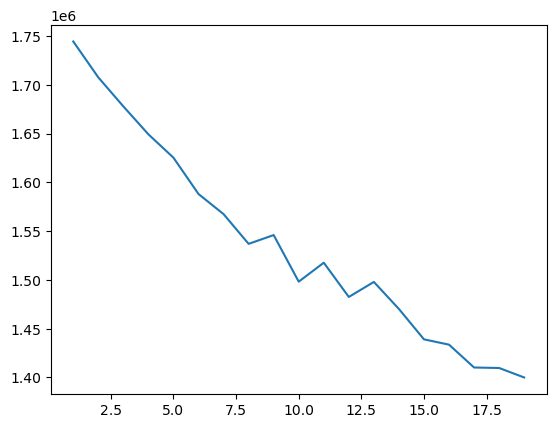

In [199]:
import matplotlib.pyplot as plt

x_index = []
y_value = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(X_cnt)
    x_index.append(i)
    y_value.append(kmeans.inertia_)
plt.plot(x_index, y_value)

In [203]:
df = X.to_frame('Lyric')
df['cluster'] = kmeans.labels_
df

,Lyric,cluster
0,헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨...,3
1,항구의 일번지 부기우기 일번지 그라스를 채워다오 부기우기 아가씨 고동이 슬피울면 이...,3
2,하룻밤 뱃길이면 가고 오건만 못 가는 이국땅에 서러움이 많 아현해탄 파도 위에 비친...,3
3,푸르른 달빛이 파도에 부서지면 파이프에 꿈을 실은 첫사랑 마도로스 배귀에 기대서면 ...,3
4,조기를 담뿍잡아 기폭을 올리고 온다던 그배는 어이하여 아니오나 수평선 바라보며 그이...,3
...,...,...
2271,바람 같은 그대가 나를 스쳐가네요 잠시 쉬어 날 바라봐요 이 모든 날들이 영원할 순...,0
2272,do your thang do your thang with me now do you...,2
2273,어 그래 얘들아 사는게 개같지 내 얼굴도 개같지 뭐얌 근데도 부자가 됐다 세상은 공...,2
2274,all i wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...,3


In [ ]:
# 3    1390
# 0     541
# 2     334
# 4       9
# 1       2

In [227]:
df[df['cluster'] == 2]

,Lyric,cluster
250,어디에 있었니 내 아들아 어디에 있었니 내 딸들아 나는 안개낀 산 속에서 방황했었다...,2
299,나는 네가 좋아서 순한 양이 되었지 풀밭 같은 너의 가슴에 내 마음은 뛰어 놀았지 ...,2
345,외로운 내 마음이 불러보는 옛 노래 언젠가 당신이 불러준 그리웠던 그노래 지금은 어...,2
443,풀빛이 마냥 푸를 때 우리의 웃음 푸르렀고 구름이 마냥 피어날 때 우리의 꿈도 피어...,2
469,네가 만약 괴로울때면 내가 위로해줄께 네가 만약 서러울때면 내가 눈물이 되리 어두운...,2
...,...,...
2259,hey 느낌이 너무 이상한 걸 좀 나를 위해 보내준다는 말이 직감은 두려워 너무 참...,2
2264,i cant understand what people are sayin 어느 장단에...,2
2272,do your thang do your thang with me now do you...,2
2273,어 그래 얘들아 사는게 개같지 내 얼굴도 개같지 뭐얌 근데도 부자가 됐다 세상은 공...,2


In [217]:
X_cnt[df[df['cluster'] == 0].index]

<541x26206 sparse matrix of type '<class 'numpy.int64'>'
	with 58280 stored elements in Compressed Sparse Row format>

In [219]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 3)
lda.fit(X_cnt[df[df['cluster'] == 0].index])

LatentDirichletAllocation(n_components=3)

In [224]:
lda.components_.argsort()[::-1][:15]

array([[    0, 13743, 13744, ...,  7155, 10937, 14993],
       [    0, 13743, 13744, ..., 19110,  6299, 14993],
       [    0, 13743, 13744, ...,  6299,  3723, 14993]], dtype=int64)

In [226]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

display_topics(lda, cnt_vect.get_feature_names_out(), 15)

Topic # 0
사랑 그대 내 없다 날 수 보다 말 난 나르다 수 없다 못 대다 잊다 내다
Topic # 1
사랑 내 없다 그대 보다 날 널 잊다 못 수 난 다시 말 마음 사람
Topic # 2
사랑 말 널 내 사람 날 난 없다 모르다 보다 못 다 눈물 알 수


In [229]:
lda = LatentDirichletAllocation(n_components = 5)
lda.fit(X_cnt[df[df['cluster'] == 2].index])

display_topics(lda, cnt_vect.get_feature_names_out(), 15)

Topic # 0
내 보다 없다 난 말 더 baby oh ding 사랑 love 날 널 니 bounce
Topic # 1
내 uh 나나 baby 나나 나나 girl uh uh 보다 love oh 맘 난 im 날 널
Topic # 2
내 난 널 날 보다 사랑 넌 love 더 없다 안 말 oh 나르다 다
Topic # 3
내 없다 보다 난 말 eh 날 oh eh eh 니 사랑 모르다 맘 널 나르다
Topic # 4
내 난 없다 보다 넌 말 날 니 사랑 널 내다 버리다 yeah oh 못


In [230]:
lda = LatentDirichletAllocation(n_components = 2)
lda.fit(X_cnt[df[df['cluster'] == 4].index])

display_topics(lda, cnt_vect.get_feature_names_out(), 15)

Topic # 0
oh oh oh 없다 철 철 없다 ah 내 ah ah 미치다 보다 뛰다 사랑 오빠 많이 위로
Topic # 1
oh oh oh yeah oh yeah give baby nanana yeah yeah 너무 yeah oh 내 na love 말 자꾸만


In [231]:
lda = LatentDirichletAllocation(n_components = 2)
lda.fit(X_cnt[df[df['cluster'] == 1].index])

display_topics(lda, cnt_vect.get_feature_names_out(), 15)

Topic # 0
like 돼다 사랑 좋다 널 사랑 니 제발 니 좋다 fine 웃기다 제발 제발 놈 smile 론 원래
Topic # 1
ooh ooh ooh 널 내 내다 넌 말 like 미치다 땜 uh 널 내다 돼다 사랑 좋다


In [233]:
lda = LatentDirichletAllocation(n_components = 7)
lda.fit(X_cnt[df[df['cluster'] == 3].index])

display_topics(lda, cnt_vect.get_feature_names_out(), 15)

Topic # 0
la la la 없다 내 나나 보다 밤 좋다 나나 나나 날 말 사람 whoo 속 그렇다
Topic # 1
없다 내 우우 마음 보다 잊다 가다 put 우 눈 말 바람 그대 꿈 사랑
Topic # 2
내 사랑 없다 날 보다 말 못 가다 눈물 속 마음 다시 난 da 버리다
Topic # 3
내 사람 보다 그대 없다 가다 마음 밤 사랑 생각 말 knock 잊다 날 수
Topic # 4
사랑 내 그대 없다 말 마음 날 난 떠나다 수 잊다 다시 오다 밤 나르다
Topic # 5
내 없다 말 보다 날 사랑 그렇다 오다 난 수 울다 못 눈물 마음 떠나다
Topic # 6
내 사랑 보다 난 못 라라라라 없다 다시 마음 아아 꿈 속 하늘 가다 날


In [241]:
def get_cluster_details(cluster_model, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
    return cluster_details


def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('=============================')

clust_centers = kmeans.cluster_centers_
feature_names = cnt_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=kmeans, 
                                        feature_names=feature_names, 
                                        clusters_num=5, 
                                        top_n_features=15 )
print_cluster_details(cluster_details)


####### Cluster 0
Top features: ['마음', '내', '가다', '님', '바람', '사람', '사랑', '밤', '길', '오다', '노래', '꿈', '보다', '하늘', '울다']
####### Cluster 1
Top features: ['사랑', '내', '말', '사람', '잊다', '못', '사랑 사랑', '널', '없다', '날', '보다', '가슴', '아프다', '눈물', '마음']
####### Cluster 2
Top features: ['oh', 'love', 'baby', 'im', '내', 'oh oh', 'yeah', '난', 'like', '넌', '보다', 'boy', 'come', '날', 'dont']
####### Cluster 3
Top features: ['그대', '사랑', '내', '대다', '없다', '수', '말', '마음', '날', '잊다', '나르다', '그대 사랑', '난', '눈물', '모습']
####### Cluster 4
Top features: ['없다', '내', '난', '니', '수', '널', '보다', '날', '사랑', '말', '수 없다', '더', '싶다', '넌', '그렇다']


In [243]:
lda = LatentDirichletAllocation(n_components=5)
lda.fit(X_cnt)

LatentDirichletAllocation(n_components=5)

In [244]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
feature_names = cnt_vect.get_feature_names_out()
display_topics(lda, feature_names, 15)

Topic # 0
oh love baby im oh oh yeah like dont come hey girl go 우우 boy know
Topic # 1
인증 성인 이용 보호 줄다 문제 법 lie 필요하다 후 코 따르다 뭔 데 날 두다 누
Topic # 2
라라라라 루루 라라라라 라라라라 라라라 라라라라 라라라 라라 맨 색깔 배 너무나 사랑 아들 개다 나타나다 다리 물어보다
Topic # 3
님 사랑 마음 가다 바람 꽃 내 밤 잊다 길 오다 가슴 그립다 노래 울다
Topic # 4
사랑 내 그대 없다 말 난 보다 날 수 널 사람 나르다 못 마음 니


In [263]:
from sklearn.metrics.pairwise import cosine_similarity

similary = cosine_similarity(X_cnt)

In [266]:
index = np.argsort(similary, axis = 1)[:, ::-1]

In [269]:
df[df['Title'] == '너의 의미']

,ID,Year,Title,Singer,Lyric
678,679,1985,너의 의미,산울림,너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 ...


In [270]:
df[df['Title'].str.contains('너의 의미')]

,ID,Year,Title,Singer,Lyric
678,679,1985,너의 의미,산울림,너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 ...
1994,1995,2014,너의 의미 (Feat. 김창완),아이유,너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 ...


In [271]:
similary = cosine_similarity(X_cnt[1994], X_cnt)

In [275]:
np.argsort(similary, axis = 1)[:, ::-1]

array([[1994,  678,  670, ...,  905,  373,  614]], dtype=int64)

In [276]:
np.sort(similary, axis = 1)[:, ::-1]

array([[1.        , 0.97988837, 0.17245517, ..., 0.        , 0.        ,
        0.        ]])

In [277]:
df.loc[678, 'Lyric']

'너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 그 뒷모습도 나에겐 힘겨운 약속 너의 모든 것은 내게로 와 풀리지 않는 수수께끼가 되네 슬픔은 간이역의 코스모스로 피고 스쳐 불어온 넌 향긋한 바람 나 이제 뭉게구름 위에 성을 짓고 널 향해 창을 내리 바람드는 창을 너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 그 뒷모습도 나에겐 힘겨운 약속 너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 그 뒷모습도 나에겐 힘겨운 약속 너의 모든 것은 내게로 와 풀리지 않는 수수께끼가 되네 슬픔은 간이역의 코스모스로 피고 스쳐 불어온 넌 향긋한 바람 나 이제 뭉게구름 위에 성을 짓고 널 향해 창을 내리 바람드는 창을 펼치기'

In [278]:
df.loc[1994, 'Lyric']

'너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 그 뒷모습도 나에겐 힘겨운 약속 너의 모든 것은 내게로 와 풀리지 않는 수수께끼가 되네 슬픔은 간이역의 코스모스로 피고 스쳐 불어온 넌 향긋한 바람 나 이제 뭉게구름 위에 성을 짓고 널 향해 창을 내리 바람 드는 창을 너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 그 뒷모습도 나에겐 힘겨운 약속 너의 모든 것은 내게로 와 풀리지 않는 수수께끼가 되네 슬픔은 간이역의 코스모스로 피고 스쳐 불어온 넌 향긋한 바람 나 이제 뭉게구름 위에 성을 짓고 널 향해 창을 내리 바람 드는 창을 슬픔은 간이역의 코스모스로 피고 스쳐 불어온 넌 향긋한 바람 나 이제 뭉게구름 위에 성을 짓고 널 향해 창을 내리 바람 드는 창을 너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 그 뒷모습도 나에겐 힘겨운 약속 펼치기'

In [280]:
X_cnt[1994]

<1x3218 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [285]:
new_lyric = '''Dearest, darling, my universe
날 데려가 줄래?
나의 이 가난한 상상력으론
떠올릴 수 없는 곳으로
저기 멀리 from Earth to Mars
꼭 같이 가줄래?
그곳이 어디든
오랜 외로움, 그 반대말을 찾아서
어떤 실수로
이토록 우리는 함께일까?
세상에게서 도망쳐 run on
나와 저 끝까지 가줘 my lover
나쁜 결말일까?
길 잃은 우리 둘 mm
부서지도록 나를 꼭 안아
더 사랑히 내게 입 맞춰 lover
Love is all, love is all
Love, love, love, love
결국, 그럼에도
어째서 우리는 서로일까?
세상에게서 도망쳐 run on
나와 저 끝까지 가줘 my lover
나쁜 결말일까?
길 잃은 우리 둘 mm
찬찬히 너를 두 눈에 담아
한 번 더 편안히 웃어주렴
유영하듯 떠오른
그날 그 밤처럼
나와 함께 겁 없이 저물어줄래?
산산히 나를 더 망쳐 ruiner
너와 슬퍼지고 싶어 my lover
필연에게서 도망쳐 run on
나와 저 끝까지 가줘 my lover
일부러 나란히 길 잃은 우리 두 사람
부서지도록 나를 꼭 안아
더 사랑히 내게 입 맞춰 lover
Our love wins all, love wins all
Love, love, love, love
'''
new_lyric = cleaning(new_lyric)

test = cnt_vect.transform([new_lyric])
similary = cosine_similarity( test, X_cnt)
index = np.argsort(similary, axis = 1)[:, ::-1][0,0]
value = np.sort(similary, axis = 1)[:, ::-1][0,0]
print(value)
df.loc[index, ['Title', 'Singer', 'Lyric']]

0.46331493441196214


Title                             나 왜이래 (Feat. 강민희 Of 미스에스)
Singer                                                San E
Lyric     나 왜이래 널 바라보면 나 왜이래 표정관리가 안돼 얼굴에 써있나봐 널 원하고 있다고...
Name: 1997, dtype: object

In [286]:
pd.read_csv('악플 데이터.csv')

,content,target
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
9970,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1
9971,머...제네시스..올라프에디션?,1
9972,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0
9973,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0


In [288]:
df = pd.read_csv('unsmile_data.csv')

In [297]:
import seaborn as sns

sns.load_dataset('iris')[['species']]

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [303]:
y = df.iloc[:, 1:]
y_label = pd.DataFrame({'target': y.columns})

In [304]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
oh_enc.fit(y_label)

OneHotEncoder()

In [308]:
oh_enc.categories_[0]

array(['clean', '개인지칭', '기타 혐오', '남성', '성소수자', '악플/욕설', '여성/가족', '연령',
       '인종/국적', '종교', '지역'], dtype=object)

In [312]:
y_oh = y[oh_enc.categories_[0]]

In [316]:
y_oh.drop([5876, 11942], inplace=True)

In [317]:
oh_enc.inverse_transform(y_oh)

array([['clean'],
       ['종교'],
       ['clean'],
       ...,
       ['인종/국적'],
       ['여성/가족'],
       ['남성']], dtype=object)

In [322]:
data = df[['문장']]
data.drop([5876, 11942], inplace=True)
data[['정답']] = oh_enc.inverse_transform(y_oh)
data

,문장,정답
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,clean
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,종교
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,clean
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,clean
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,여성/가족
...,...,...
18737,저게 시대적언어면 한남충도 시대적언어 아니노 ㅋㅋ,남성
18738,다른것보다 눈이 어떻게 저렇게 생기노.탄식.,악플/욕설
18739,막노동을 해도 한국에살고말지 미쳤다고 남미를가냐?차라리 자살을하겠다.,인종/국적
18740,‘사형을 구형하였으나 여성인 점을 감안해 25년 선고’ ???내가 뭐 잘못본건가?개...,여성/가족
